<a href="https://colab.research.google.com/github/gusujio/neural_networks_start/blob/master/%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BA%D0%B82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

# Train dataset

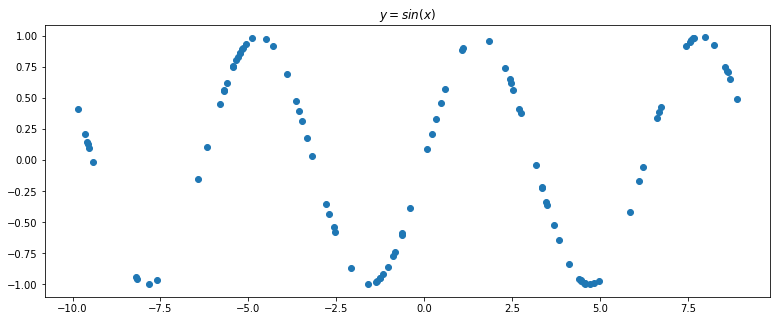

In [ ]:
x_train = torch.rand(100) # будем пытаться предсказать y по x 
x_train = x_train * 20.0 - 10.0

y_train = torch.sin(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$');

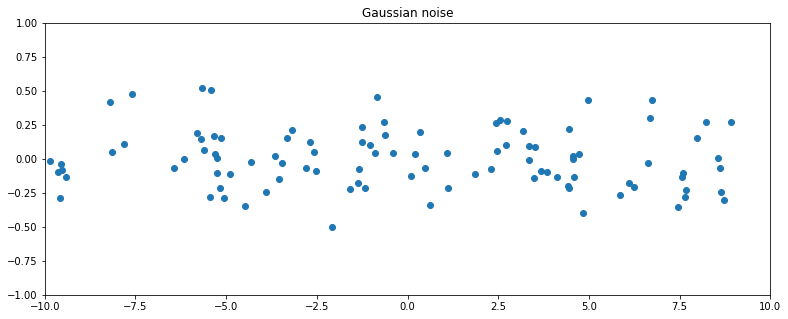

In [ ]:
noise = torch.randn(y_train.shape) / 5. # добавим шума для большего правдоподобия 

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');

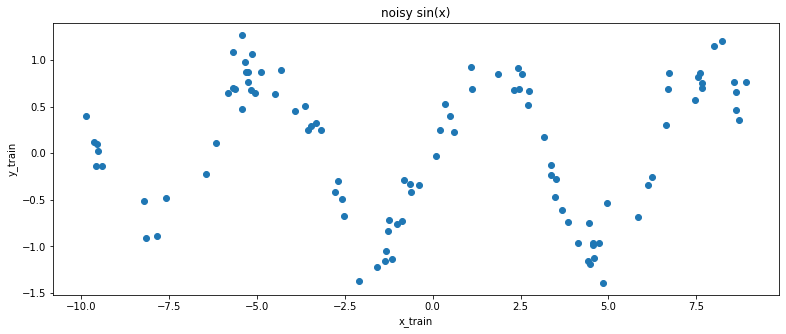

In [ ]:
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

In [ ]:
x_train.unsqueeze_(1) # из строк сделаем стобцы 
y_train.unsqueeze_(1);

In [ ]:
tmp = torch.Tensor([1,2,3])
print(tmp)
print(tmp.unsqueeze(1))

tensor([1., 2., 3.])
tensor([[1.],
        [2.],
        [3.]])


# Validation dataset¶


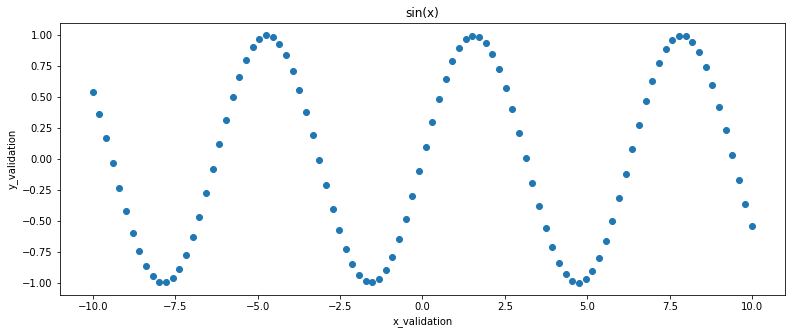

In [ ]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [ ]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

# Model construction

In [ ]:
class SineNet(torch.nn.Module):# что бы мог унаследовать функции, кроме того, нам нужно проиници-вать те слои, которые будут использоваться в сети. 
# То есть мы пишем функцию "__init__", она на вход может принимать что угодно,
#  любые параметры, которые нам будет интересно передать в эту сеть в момент конструирования.
#  Нам, например, интересно передать количество скрытых нейронов,
#  которые будут храниться в каждом слое, то есть мы предполагаем, что все слои будут одинакового размера.
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()# инициируем родительский объект.
# метод super(arg1, arg2). arg1 - класс родителя, который мы хотим проверить,
# arg2 - объект с которым мы хотим связать метод. 
# Таким образом с помощью этого метода мы обращаемся к методам родительского класса
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons) #первый слой 1 - входные нейроны, а потом выходные 
        self.act1 = torch.nn.Sigmoid() #функция активации 
# Кроме того, мы добавим ещё один полносвязанный слой, 
# но у него будет всего один нейрон. Этот нейрон будет нашим ответом на вопрос.        
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)
#  В итоге, наша нейросеть будет выглядеть, как два слоя,
#  в одном из них будет несколько нейронов а во втором будет один.
#  И теперь нам нужно написать функцию forward, то есть то, как наши слои последовательно применяются
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x
# forward повторяет нашу инициализацию.         

sine_net = SineNet(50)

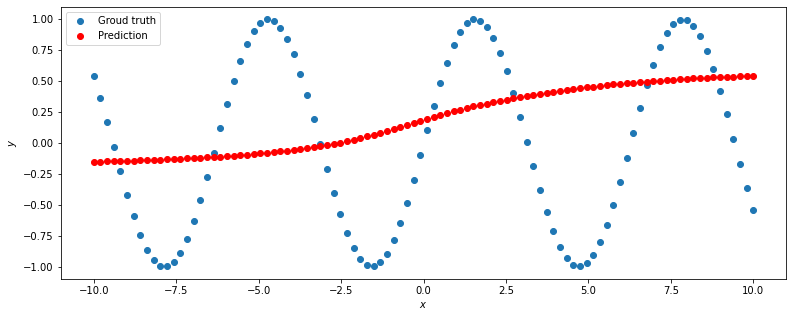

In [ ]:
def predict(net, x, y):
    y_pred = net.forward(x) #предсказывает

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth') # просто рисует
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(sine_net, x_validation, y_validation)

#Optimizer

In [ ]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)


# Loss function

In [ ]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

# Training procedure¶


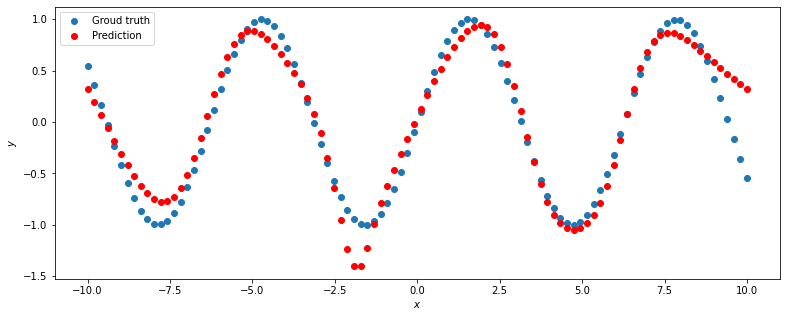

In [ ]:
for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = sine_net.forward(x_train)  
    loss_val = loss(y_pred, y_train)

    loss_val.backward()
#градиен считается по предыдущем весам
    optimizer.step()

predict(sine_net, x_validation, y_validation)

In [ ]:
# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);
# ------Dataset preparation end--------:

In [ ]:
import torch

def target_function(x):
    return 2**x * torch.sin(2**-x)

class RegressionNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(RegressionNet, self).__init__()# инициируем родительский объект.
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return(x)
net = RegressionNet(2)


In [ ]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

def loss(pred, target):
    return(torch.abs(pred - target).mean())

for epoch_index in range(2500):
    optimizer.zero_grad()
    y_pred = net.forward(x_train)
    loss_value = loss(y_pred, y_train)
    loss_value.backward()
    optimizer.step()

value:  0.02986058220267296


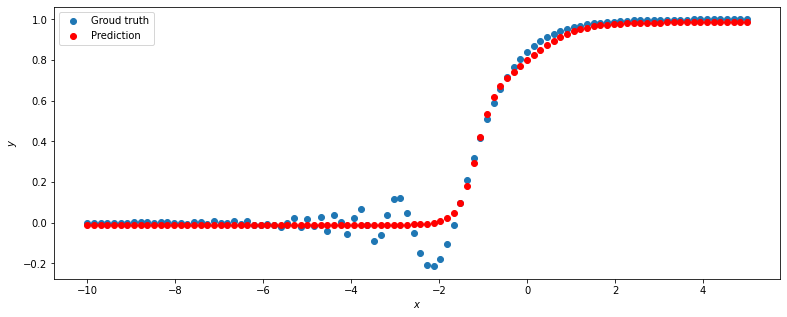

In [ ]:
# Проверка осуществляется вызовом кода:
def metric(pred, target):
   return (pred - target).abs().mean()
predict(net, x_validation, y_validation)   
print('value: ' ,metric(net.forward(x_validation), y_validation).item())
